<div style="background-color:gray;width:100%;display:flex;justify-content:center;font-size:3rem">HMM & GMM</div>

In [1]:
import numpy as np
import os
import scipy
from scipy.io import wavfile

In [2]:
file_paths = []
labels = []

base_path = './Audio'

# print(os.listdir(base_path))

for folder in os.listdir(base_path):
    for file in os.listdir(f'{base_path}/{folder}'):
        file_paths.append(f'{base_path}/{folder}/{file}')
        labels.append(folder)

print(file_paths)
print(labels)

['./Audio/apple/apple0.wav', './Audio/apple/apple01.wav', './Audio/apple/apple02.wav', './Audio/apple/apple03.wav', './Audio/apple/apple04.wav', './Audio/apple/apple05.wav', './Audio/apple/apple06.wav', './Audio/apple/apple07.wav', './Audio/apple/apple08.wav', './Audio/apple/apple09.wav', './Audio/apple/apple1.wav', './Audio/apple/apple10(1).wav', './Audio/apple/apple10.wav', './Audio/apple/apple11(1).wav', './Audio/apple/apple11.wav', './Audio/apple/apple12(1).wav', './Audio/apple/apple12.wav', './Audio/apple/apple13(1).wav', './Audio/apple/apple13.wav', './Audio/apple/apple14(1).wav', './Audio/apple/apple14.wav', './Audio/apple/apple15.wav', './Audio/apple/apple2.wav', './Audio/apple/apple3.wav', './Audio/apple/apple4.wav', './Audio/apple/apple5.wav', './Audio/apple/apple6.wav', './Audio/apple/apple7.wav', './Audio/apple/apple8.wav', './Audio/apple/apple9.wav', './Audio/banana/banana01.wav', './Audio/banana/banana02.wav', './Audio/banana/banana03.wav', './Audio/banana/banana04.wav', 

In [3]:
data = np.zeros((len(file_paths), 32000))
max_sample_rate = -1

for idx, file in enumerate(file_paths):
    _, d = wavfile.read(file)
    data[idx , :d.shape[0]] = d
    if d.shape[0] > max_sample_rate:
        max_sample_rate = d.shape[0]

data = data[:, :max_sample_rate]

print(data)



[[  0.   0.   0. ...   0.   0.   0.]
 [-26. -56. -22. ...   0.   0.   0.]
 [102. 151.  82. ...   0.   0.   0.]
 ...
 [-33. -25.  19. ...   0.   0.   0.]
 [ 21.   1.  -7. ...   0.   0.   0.]
 [ 98. 113.  80. ...   0.   0.   0.]]


In [4]:
all_labels = np.zeros(len(labels))

for n, lab in enumerate(set(labels)):
    print(n,lab)
    all_labels[np.array([i for i, l in enumerate(labels) if l == lab])]  = n
print(all_labels)

0 book
1 cat
2 lime
3 apple
4 peach
5 god
6 fast
7 human
8 banana
9 eye
10 kiwi
11 orange
12 pineapple
13 dog
[ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.
  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.  8.  8.  8.  8.  8.  8.
  8.  8.  8.  8.  8.  8.  8.  8.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13.
  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  9.  6.  6.  6.
  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  6.  5.  5.  5.  5.  5.  5.
  5.  5.  5.  5.  5.  5.  5.  5.  5.  7.  7.  7.  7.  7.  7.  7.  7.  7.
  7.  7.  7.  7.  7.  7. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4. 12. 12. 12. 12. 12. 12.
 12. 12. 12. 1

In [5]:
dictionary = [''] * 14

for i in range(0,len(all_labels)):
    dictionary[int(all_labels[i])] = labels[i]

print(dictionary)

['book', 'cat', 'lime', 'apple', 'peach', 'god', 'fast', 'human', 'banana', 'eye', 'kiwi', 'orange', 'pineapple', 'dog']


Text(0, 0.5, 'Amplitude')

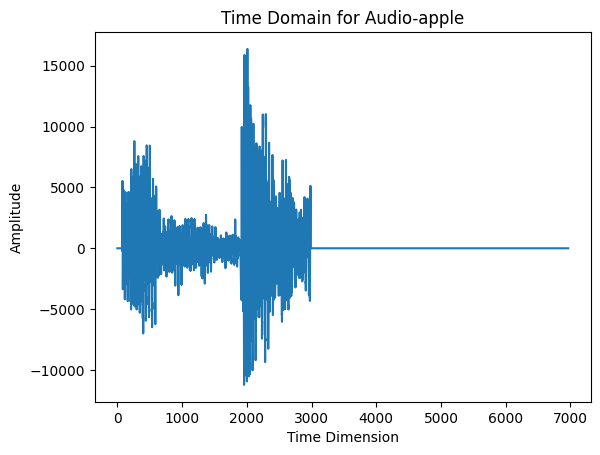

In [6]:
import matplotlib.pyplot as plt

plt.plot(data[0,:])
plt.title(f'Time Domain for Audio-{labels[0]}')
plt.xlabel('Time Dimension')
plt.ylabel('Amplitude')

In [7]:
def stft(x, fftsize=64, overlap_pct = 0.5):
    w = np.hanning(fftsize + 1)[:-1]

    hop = int(fftsize*(1-overlap_pct))

    raw = np.array([
        (np.fft.rfft(w * x[i:i+fftsize])) for i in range(0,len(x)- fftsize,hop)
    ])

    return raw[:, :(fftsize // 2)]


In [8]:
from numpy.lib.stride_tricks import as_strided

def peakfind(x, n_peaks, l_size= 3, c_size = 3, r_size = 3):
    win_size = l_size + c_size + r_size
    shape = x.shape[:-1] + (x.shape[-1] - win_size + 1, win_size )
    strides = x.strides + (x.strides[-1], )

    xs = as_strided(x,shape = shape,strides=strides)

    def is_peak(x):
        centered = (np.argmax(x) == l_size + (c_size/2))
        l = x[:l_size]
        c = x[l_size:l_size+c_size]
        r = x[-r_size:]
        max = np.max(c) > np.max([np.mean(l), np.mean(r)])

        if centered and max:
            return np.max(c)
        else:
            return -1

    r = np.apply_along_axis(is_peak, 1, xs)
    top = np.argsort(r, None)[::-1]
    heights = r[top[:n_peaks]]
    top[top > -1] = top[top > -1] + l_size + int(c_size/2)


    return heights, top[:n_peaks]

In [9]:
all_obs = []

for i in range(data.shape[0]):
    d = np.abs(stft(data[i,:]))
    
    n_dim = 6
    obs = np.zeros((n_dim, d.shape[0]))
    
    for n in range(d.shape[0]):
        _, top = peakfind(d[n,:],n_peaks=n_dim)
        obs[:,n] = top.copy()
        
    all_obs.append(obs)
    
    if i % 10 ==0:
        print(f'Already processed {i} observer')
    
all_obs = np.atleast_3d(all_obs)
print(f'All observer dim {all_obs.shape}')


Already processed 0 observer
Already processed 10 observer
Already processed 20 observer
Already processed 30 observer
Already processed 40 observer
Already processed 50 observer
Already processed 60 observer
Already processed 70 observer
Already processed 80 observer
Already processed 90 observer
Already processed 100 observer
Already processed 110 observer
Already processed 120 observer
Already processed 130 observer
Already processed 140 observer
Already processed 150 observer
Already processed 160 observer
Already processed 170 observer
Already processed 180 observer
Already processed 190 observer
Already processed 200 observer
Already processed 210 observer
Already processed 220 observer
All observer dim (225, 6, 216)


In [18]:
from scipy.stats import multivariate_normal

class HMM_GMM:
    def __init__(self, n_state):
        self.n_states = n_state
        self.random_state = np.random.RandomState(0)
        
        self.prior = self._normalize(self.random_state.rand(self.n_states, 1))
        self.A = self._stochaticize(self.random_state.rand(self.n_states,self.n_states))
        
        self.mu = None
        self.covs = None
        self.n_dims = None
        
    # Normalisasi agas skala 0-1
    def _normalize(self, x):
        return (x + (x == 0)) / np.sum(x)
    
    def _stochaticize(self, x):
        return (x + (x == 0))/ np.sum(x,axis = 1)
    
    # Matriks B, mempresentasikan kemungkinan terjadinya state pada set observasi tiap waktunya
    def _forward(self, B):
        log_likelihood = 0.
        T = B.shape[1]
        
        alpha = np.zeros(B.shape)
        
        for t in range(T):
            if t == 0:
                alpha[:, t] = B[:, t] * self.prior.ravel()
            else:
                alpha[:, t] = B[:, t] * np.dot(self.A.T, alpha[:,t-1])

            alpha_sum = np.sum(alpha[:,t])
            alpha[:,t] = alpha[:,t] / alpha_sum
            
            log_likelihood = log_likelihood+np.log(alpha_sum)
        
        return log_likelihood, alpha

    def _backward(self, B):
        T = B.shape[1]
        
        beta = np.zeros(B.shape)
        
        beta[:,-1] = np.ones(B.shape[0])
        
        for t in range(T-1)[::-1]:
            beta[:,t] = np.dot(self.A,(B[:,t+1]))
            beta[:,t] = beta[:,t] / np.sum(beta[:,t])
            
        return beta
    

    def _state_likelihood(self, obs):
        obs = np.atleast_2d(obs)
        B = np.zeros((self.n_states, obs.shape[1]))
        
        for s in range(self.n_states):
            np.random.seed(self.random_state.randint(1))
            
            # multivariate normal
            B[s,:] = multivariate_normal.pdf(
                obs.T, mean=self.mu[:,s].T, convs = self.convs[:, : ,s].T
            )
            
        return B
    
    
    
    '''
        EM Algorithm -> Untuk melakukan estimasi parameter berdasarkan data agar hasil prediksi lebih baik
        1. Expectation (E-Step) -> Forward + Backward
        2. Maximize (M-Step) -> override parameter
    '''
    
    def _em_init(self, obs):
        if self.n_dims is None:
            self.n_dims = obs.shape[0]
        if self.mu is None:
            subset = self.random_state.choice(np.array(self.n_dims), size=self.n_states, replace=False)
            
            self.mu = obs[:,subset]
            
        if self.covs is None:
            self.covs = np.zeros((self.n_dims,self.n_dims,self.n_states))
            self.covs = self.covs + np.diag(np.diag(np.cov(obs)))[:,:,None]
            
        
        return self
    
    def _em_step(self, obs):
        obs = np.atleast_2d(obs)
        B = self._state_likelihood(obs)
        T = obs.shape[1]
        
        
        # Expectatio step
        log_likelihood, alpha = self._forward(B)
        beta = self._backward(B)
        
        # Maximize step
        
        xi_sum = np.zeros((self.n_states,self.n_states))
        
        gamma = np.zeros((self.n_states,T))
        
        for t in range(T-1):
            partial_sum = self.A * np.dot(alpha[:,t],(beta[:,t]*B[:,t+1]).T)
            xi_sum += self._normalize(partial_sum)
            
            partial_g = alpha[:,t] * beta[:,t]
            
            gamma[:,t] = self._normalize(partial_g)
        
        partial_g = alpha[:,-1] * beta[:,-1]
        gamma[:,-1] = self._normalize(partial_g)
        
        expected_prior = gamma[:,0]
        expected_A = self._stochaticize(xi_sum)
        
        expected_mu = np.zeros((self.n_dims,self.n_states))
        expected_covs = np.zeros((self.n_dims,self.n_dims,self.n_states))
        
        gamma_state_sum = np.sum(gamma,axis=1)
        gamma_state_sum += (gamma_state_sum == 0)
        
        for s in range(self.n_states):
            gamma_obs = obs * gamma[s,:]
            expected_mu = np.sum(gamma_obs,axis=1) / gamma_state_sum[s]
        
            partial_covs = np.dot(gamma_obs,obs.T) / gamma_state_sum[s] - np.dot(expected_mu[:,s],expected_mu[:,s].T)

            partial_covs = np.triu(partial_covs) + np.triu(partial_covs).T - np.diag(partial_covs.T)
            
        expected_covs += 0.01 * np.eye(self.n_dims)[:,:,None]
        
        self.prior = expected_prior
        self.A = expected_A
        self.mu = expected_mu
        self.covs = expected_covs
        
        return log_likelihood

    def fit(self, obs, n_iter=8):
        # Single Audio
        if (obs.shape) == 2:
            for i in range(n_iter):
                self._em_init(obs)
                log_likehood = self._em_step(obs)
        elif (obs.shape) == 3:
            count = obs.shape[0]
            for n in range(count):
                for i in range(n_iter):
                    self._em_init(obs[n,:,:])
                    log_likehood = self._em_step(obs[n,:,:])
                    
    
    
    def transform(self,obs):
        if(obs.shape)==2:
            B = self._state_likelihood(obs)
            log_likelihood, _ =self._forward(B)
            return log_likelihood
        elif(obs.shape)==3:
            count = obs.shape[1]
            out = np.zeros((count,))
            for n in range(count):
                B = self._state_likelihood(obs[n,:,:])
                log_likelihood, _ =self._forward(B)
                out[n] = log_likelihood
            
            return out
            

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

spliter = StratifiedShuffleSplit(8, test_size=0.1, random_state=42)

for n, obs in enumerate(all_obs):
    all_obs[n] = all_obs[n]/all_obs[n].sum(axis=0)
    
X = all_obs
y = all_labels

for train_index, test_index in spliter.split(X,y):
    print(f'Train: {train_index}, Test: {test_index}')
    X_train, x_test = all_obs[train_index,...], all_obs[test_index,...] # or all_obs[train_index,:,:] sama aja
    y_train,y_test = all_labels[train_index], all_labels[test_index]
    
    

Train: [ 75  54 170  13 133 124 160 118 161  31  46  20  18 206  39  21  10  61
 142  50 207  72  42 120  55 105 144  78 177 109 209  76  47  23  79 140
 135 172 151  98   7  29 199  74 121 162 150 224  62 191  22  95  24 200
 216 173 102 188 165 164  33 218 194 203 106 176   2 184  81 196 213  99
  51   8 127  28 111   4 221 147  53  73 117  34 219  26 167 181 138 132
  65 115 137  15 211 178  63 122  17 204 119 146  64   6 153  48  67 100
  66  59  36 220 175 108 169  16 201 174  91  11 159 136  70 180  68 222
 130  88 182 129 158  93 205 223 139  89  40 103 157  58 168  92  25 154
  86  85   3 143 183 186  56 113   0 163  49  77 114 125 179  37 152   9
 116 187 193 126  84 185  96  45 128 195  43 112  94  97 110 145 197  60
 166 101  44  83 210  14 215 155 192  12  87  35  90  41 123   5  38  57
 148 217 202 214], Test: [190 131 189  52  30  32 208 134  69 141  80 156  71 104 149  19 171   1
  27  82 107 212 198]
Train: [ 81  90  69  52 185  58 127 133 213 200 192  91 150 199 167  1

In [21]:
ys = set(all_labels)

ms = [HMM_GMM(6) for y in ys]
_ = [m.fit(X_train[y_train==y,:,:]) for m,y in zip(ms, ys)]
ps = [m.transform(x_test) for m in ms]

ps

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [26]:
y_train.shape

(202,)